## Determinación de parametros $x$, $y$ de la función de Rosenbrock

Primero definimos la función de Rosenbrock,

$$
f(x, y) = (a - x)^2 + b(y - x^2)^2
$$

Para los valores de $a=1$ y $b=100$ la función de Rosenbrock tiene un mínimo en $(1,1)$.
De modo que la tarea a realizar es programar un algoritmo genético (AG) que sea
capaz de encontrar dichos valores.

---

Importando librerias a utilizar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

Vamos a definir la función _graficar_, la cual nos será de utilidad para al final tener una
grafica de la función y localizar la pareja ordenada $(x, y)$ en el plano.

In [102]:
def graficar(X_best, Y_best):
    
    # Funcion de Rosenbrock
    f = lambda x,y: (1-x)**2 + 100*(y-x**2)**2;
    
    # Inicializamos la figura
    figRos = plt.figure(figsize=(7, 7))
    axRos = figRos.add_subplot(projection='3d')

    # Evaluamos la función.
    X = np.arange(-2, 2, 0.15)
    Y = np.arange(-1, 3, 0.15)
    X, Y = np.meshgrid(X, Y)
    Z = f(X,Y)
    
    # Evaluamos la función en los mejores puntos.
    Z_best = f(X_best, Y_best)
    
    # Graficamos la superficie
    surf = axRos.plot_surface(X, Y, Z, cmap="turbo", linewidth=0)
    
    # Graficamos el punto (x,y)
    axRos.scatter(X_best , Y_best, Z_best, color="lime", s=10)
    
    # Damos un limite al eje Z
    axRos.set_zlim(0, 2000)
    
    #figRos.colorbar(surf, shrink=0.5, aspect=10)
    axRos.set_xlabel("$x$", fontsize=20)
    axRos.set_ylabel("$y$", fontsize=20)
    axRos.set_zlabel("$f(x, y)$", fontsize=20,  rotation=90)
    #axRos.set_zticks([])
    axRos.set_zticks([0, 2000])
    #cset = axRos.contourf(X, Y, Z, cmap=cm.coolwarm)
    #axRos.clabel(cset, fontsize=100, inline=1)
    plt.title("Función de Rosenbrock")
    plt.savefig("prueba2.svg")
    

    plt.show()

Continuando con la parte del GA, vamos a definir los parametros de población,
dimensión, el factor de cruce, el factor de mutación y la cantidad de generaciones.

In [88]:
# Parametros
pop = 100
dim = 2
elit = 2
cruce = 0.9
T_mut = 0.2
generation = 100

Como se mencionó, se utilizarán los valores de $a=1$ y $b=100$

In [4]:
a = 1
b = 100

Para tener una mejor aproximación de los valores obtenidos, vamos a realizar $100$ experimentos,
es decir, vamos a obtener los $100$ mejores valores y vamos a promediar sobre todos ellos.
Los mejores valores los guardaremos en una lista, y despues solo obtendremos el promedio de cada lista.

In [5]:
experimentos = 100
X_best = np.empty([])
Y_best = np.empty([])

Ahora escribimos el ciclo de los 100 experimentos.

In [6]:
for experimento in range(experimentos):
    # Creamos las matrices de poblacion y el target.
    M_pop = np.zeros((pop, dim))
    M_target = np.zeros((pop, 1))

    # Rellenamos las matrices con valores aleatorios en una distribución
    # uniforme entre -2 y 3.
    for i in range(pop):
        for j in range(dim):
            M_pop[i, j] = np.random.uniform(-2, 3)
        M_target[i] = (a - M_pop[i, 0])**2 + b*(M_pop[i, 1] - M_pop[i, 0]**2)**2
    
    # Concatenamos las matrices anteriores, de modo que tenemos una matriz de 100x3
    M_ag =  np.hstack((M_pop, M_target))
    
    # Aqui comenzamos con el GA
    
    gen = 1
    AG = 2
    
    while gen <= generation:
        # Ordenamos con respecto a la columna target
        M_ag = M_ag[M_ag[:, 2].argsort()]
        # Creamos una matriz temporal, la que cada generacion
        # cambiara sus valores
        M_temp = np.zeros((pop, dim))

        # Asignacion de dos primeras lineas
        for i in range(elit):
            for j in range(dim):
                M_temp[i, j] = M_ag[i, j]
        
        # Se realiza la seleccion por combate
        for AG in range(2, pop-1): 
            N1 = np.random.randint(0, 99)
            N2 = np.random.randint(0, 99)        
            if N1 == N2:
                while True:
                    N1 = np.random.randint(0, 99)
                    if N1 != N2:
                        break
            elif N1 < N2:
                N2 = np.random.randint(0, 99)
            elif N2 < N1:
                N1 = np.random.randint(0, 99)

            # Creacion de padres
            Padre1 = M_ag[N1, :dim]
            Padre2 = M_ag[N2, :dim]
            
            # Crossover
            Cross = np.random.rand()
            if Cross <= cruce:
                
                Pc = np.random.randint(0, dim)
                for j in range(dim):
                    if j != Pc:
                        aux = Padre1[j]
                        Padre1[j] = Padre2[j]
                        Padre2[j] = aux
                
                # Si hay Crossover entonces puede haber mutacion
                Mut = np.random.rand()
                if Mut < T_mut:
                    Pm = np.random.randint(0, 1)
                    Cm = np.random.randint(0, 1)
                    if Cm == 0:
                        Padre1[Pm] = np.random.uniform(-2, 3)
                    elif Cm == 1:
                        Padre2[Pm] = np.random.uniform(-2, 3)
            
            # Cargamos a la matriz temporal con el valor de los padres nuevos
            M_temp[AG] = Padre1
            M_temp[AG + 1] = Padre2
        
        # Ahora nuestra matriz target se rellana con los valores cargados en la matriz temporal
        for i in range(pop):
            M_target[i] = (a - M_temp[i, 0])**2 + b*(M_temp[i, 1] - M_temp[i, 0]**2)**2
        
        M_ag = np.hstack((M_temp, M_target))
        gen += 1

    # Ordenamos el valor de la matriz resultado tras pasar 100 generaciones
    M_ag = M_ag[M_ag[:, 2].argsort()]
    
    # Guardamos los valores x, y encontrados en la corrida
    X_best = np.append(X_best, [M_ag[0, 0]])
    Y_best = np.append(Y_best, [M_ag[0, 1]])
    
    # Calculamos el promedio de los valores dados en la lista X_best y Y_best, de 
    # modo que vemos el valor promedio total obtenido hasta los n numero 
    # experimentos que hayan transcurrido
    X_best_avg = np.average(X_best)
    Y_best_avg = np.average(Y_best)

    print(f"Experimento: {experimento + 1}")
    print(f"X_best: {X_best_avg:.3f}, Y_best: {Y_best_avg:.3f}")
    print("-"*30)

Experimento: 1
X_best: 4.990, Y_best: 1.486
------------------------------
Experimento: 2
X_best: 3.788, Y_best: 1.630
------------------------------
Experimento: 3
X_best: 3.103, Y_best: 1.498
------------------------------
Experimento: 4
X_best: 2.676, Y_best: 1.386
------------------------------
Experimento: 5
X_best: 2.412, Y_best: 1.352
------------------------------
Experimento: 6
X_best: 2.176, Y_best: 1.242
------------------------------
Experimento: 7
X_best: 2.004, Y_best: 1.166
------------------------------
Experimento: 8
X_best: 1.873, Y_best: 1.112
------------------------------
Experimento: 9
X_best: 1.800, Y_best: 1.132
------------------------------
Experimento: 10
X_best: 1.720, Y_best: 1.106
------------------------------
Experimento: 11
X_best: 1.642, Y_best: 1.065
------------------------------
Experimento: 12
X_best: 1.597, Y_best: 1.069
------------------------------
Experimento: 13
X_best: 1.545, Y_best: 1.046
------------------------------
Experimento: 14
X_bes

Una vez transcurridos los 100 experimentos vemos los valores obtenidos

In [8]:
print(f'Solucion real: X = 1, Y = 1')
print(f'Solucion AG Avg: X = {X_best_avg:.3f}, Y = {Y_best_avg:.3f}')    

Solucion real: X = 1, Y = 1
Solucion AG Avg: X = 1.064, Y = 1.000


Como vemos, los valores son muy parecidos a los esperados.

Por último graficamos la función y el respectivo punto.

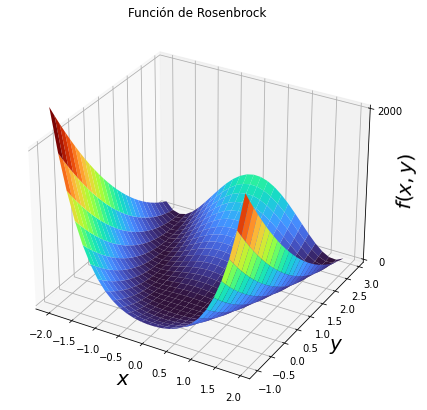

In [103]:
graficar(X_best_avg, Y_best_avg)